# Computer Vision Project

In [663]:
from scipy.spatial import distance as dist
import cv2
import numpy as np
import math
import os
import sys
import copy
from matplotlib import pyplot as plt

In [575]:
cards = {
    # Jokers in no light
    '00279': ['Joker', None, 0],
    '00390': ['Joker', None, 0],

    # Spades in no light
    '00526': ['Ace', 'Spades', 1],
    '00665': ['2', 'Spades', 2],
    '00790': ['3', 'Spades', 3],
    '00929': ['4', 'Spades', 4],
    '01079': ['5', 'Spades', 5],
    '01211': ['6', 'Spades', 6],
    '01408': ['7', 'Spades', 7],
    '01543': ['8', 'Spades', 8],
    '01680': ['9', 'Spades', 9],
    '01824': ['10', 'Spades', 10],
    '01962': ['Jack', 'Spades', 10],
    '02088': ['Queen', 'Spades', 10],
    '02230': ['King', 'Spades', 10],

    # Diamonds in no light
    '02366': ['Ace', 'Diamonds', 1],
    '02472': ['2', 'Diamonds', 2],
    '02631': ['3', 'Diamonds', 3],
    '02744': ['4', 'Diamonds', 4],
    '02921': ['5', 'Diamonds', 5],
    '03093': ['6', 'Diamonds', 6],
    '03211': ['7', 'Diamonds', 7],
    '03376': ['8', 'Diamonds', 8],
    '03495': ['9', 'Diamonds', 9],
    '03632': ['10', 'Diamonds', 10],
    '03724': ['Jack', 'Diamonds', 10],
    '03844': ['Queen', 'Diamonds', 10],
    '03957': ['King', 'Diamonds', 10],

    # Clubs in no light
    '04088': ['King', 'Clubs', 10],
    '04217': ['Queen', 'Clubs', 10],
    '04317': ['Jack', 'Clubs', 10],
    '04425': ['10', 'Clubs', 10],
    '04521': ['9', 'Clubs', 9],
    '04609': ['8', 'Clubs', 8],
    '04733': ['7', 'Clubs', 7],
    '04873': ['6', 'Clubs', 6],
    '04965': ['5', 'Clubs', 5],
    '05097': ['4', 'Clubs', 4],
    '05209': ['3', 'Clubs', 3],
    '05329': ['2', 'Clubs', 2],
    '05449': ['Ace', 'Clubs', 1],

    # Hearts in no light
    '05553': ['King', 'Hearts', 10],
    '05653': ['Queen', 'Hearts', 10],
    '05749': ['Jack', 'Hearts', 10],
    '05841': ['10', 'Hearts', 10],
    '05933': ['9', 'Hearts', 9],
    '06041': ['8', 'Hearts', 8],
    '06153': ['7', 'Hearts', 7],
    '06245': ['6', 'Hearts', 6],
    '06349': ['5', 'Hearts', 5],
    '06417': ['4', 'Hearts', 4],
    '06549': ['3', 'Hearts', 3],
    '06685': ['2', 'Hearts', 2],
    '06869': ['Ace', 'Hearts', 1],

    # Desk in no light
    '06904': ['Desk', 'Desk' , 0],
    '07064': ['Desk', 'Desk' , 0],

    # Desk in light
    '07324': ['Desk', 'Desk' , 0],
    '07344': ['Desk', 'Desk' , 0],

    # Hearts in light
    '07544': ['Ace', 'Hearts', 1],
    '07630': ['2', 'Hearts', 2],
    '07738': ['3', 'Hearts', 3],
    '07834': ['4', 'Hearts', 4],
    '07934': ['5', 'Hearts', 5],
    '08026': ['6', 'Hearts', 6],
    '08126': ['7', 'Hearts', 7],
    '08234': ['8', 'Hearts', 8],
    '08342': ['9', 'Hearts', 9],
    '08442': ['10', 'Hearts', 10],
    '08546': ['Jack', 'Hearts', 10],
    '08658': ['Queen', 'Hearts', 10],
    '08754': ['King', 'Hearts', 10],

    # Clubs in light
    '08862': ['Ace', 'Clubs', 1],
    '08970': ['2', 'Clubs', 2],
    '09074': ['3', 'Clubs', 3],
    '09186': ['4', 'Clubs', 4],
    '09282': ['5', 'Clubs', 5],
    '09378': ['6', 'Clubs', 6],
    '09490': ['7', 'Clubs', 7],
    '09610': ['8', 'Clubs', 8],
    '09722': ['9', 'Clubs', 9],
    '09810': ['10', 'Clubs', 10],
    '09926': ['Jack', 'Clubs', 10],
    '10026': ['Queen', 'Clubs', 10],
    '10142': ['King', 'Clubs', 10],

    # Diamonds in light
    '10250': ['King', 'Diamonds', 10],
    '10342': ['Queen', 'Diamonds', 10],
    '10426': ['Jack', 'Diamonds', 10],
    '10546': ['10', 'Diamonds', 10],
    '10646': ['9', 'Diamonds', 9],
    '10890': ['8', 'Diamonds', 8],
    '10734': ['7', 'Diamonds', 7],
    '11066': ['6', 'Diamonds', 6],
    '11158': ['5', 'Diamonds', 5],
    '11258': ['4', 'Diamonds', 4],
    '11366': ['3', 'Diamonds', 3],
    '11486': ['2', 'Diamonds', 2],
    '11598': ['Ace', 'Diamonds', 1],

    # Spades in light
    '11714': ['King', 'Spades', 10],
    '11814': ['Queen', 'Spades', 10],
    '11930': ['Jack', 'Spades', 10],
    '12050': ['10', 'Spades', 10],
    '12158': ['9', 'Spades', 9],
    '12258': ['8', 'Spades', 8],
    '12370': ['7', 'Spades', 7],
    '12478': ['6', 'Spades', 6],
    '12610': ['5', 'Spades', 5],
    '12718': ['4', 'Spades', 4],
    '12877': ['3', 'Spades', 3],
    '12978': ['2', 'Spades', 2],
    '13088': ['Ace', 'Spades', 1],

    # Jokers in no light
    '13220': ['Joker', None, 0],
    '13312': ['Joker', None, 0]
}

Train_overlap = {

    '00001': [['Desk', 'Desk' , 0]],
    '00165': [['King', 'Hearts', 10]],
    '00277': [['King', 'Hearts', 10], ['7', 'Hearts', 7]],
    '00445': [['King', 'Hearts', 10], ['7', 'Hearts', 7], ['8', 'Clubs', 8]],
    '00653': [['3', 'Hearts', 3]],
    '00753': [['3', 'Hearts', 3], ['5', 'Hearts', 5]],
    '00849': [['3', 'Hearts', 3], ['5', 'Hearts', 5], ['Ace', 'Clubs', 1]],
    '01049': [['3', 'Hearts', 3], ['5', 'Hearts', 5], ['Ace', 'Clubs', 1], ['Queen', 'Clubs', 10]],
    '01305': [['3', 'Hearts', 3], ['5', 'Hearts', 5], ['Ace', 'Clubs', 1], ['Queen', 'Clubs', 10], ['6', 'Diamonds', 6]],
    '01481': [['Ace', 'Diamonds', 1]],
    '01545': [['Ace', 'Diamonds', 1], ['King', 'Diamonds',  10]],
    '01641': [['Ace', 'Diamonds', 1], ['King', 'Diamonds',  10], ['5', 'Spades', 5]],
    '01765': [['Ace', 'Diamonds', 1], ['King', 'Diamonds',  10], ['5', 'Spades', 5], ['10', 'Clubs', 10]],
    '01941': [['10', 'Hearts', 10]],
    '02027': [['10', 'Hearts', 10], ['King', 'Clubs', 10]],
    '02176': [['6', 'Spades', 6]],
    '02251': [['6', 'Spades', 6], ['3', 'Clubs', 3]],
    '02344': [['6', 'Spades', 6], ['3', 'Clubs', 3], ['10', 'Spades', 10]],
    '02464': [['6', 'Spades', 6], ['3', 'Clubs', 3], ['10', 'Spades', 10], ['8', 'Diamonds', 8]],
    '02611': [['6', 'Hearts', 6]],
    '02704': [['6', 'Hearts', 6], ['10', 'Diamonds', 10]],
    '02794': [['6', 'Hearts', 6], ['10', 'Diamonds', 10], ['6', 'Clubs', 6]],
    '02986': [['4', 'Spades', 4]],
    '03091': [['4', 'Spades', 4], ['5', 'Diamonds', 5]],
    '03172': [['4', 'Spades', 4], ['5', 'Diamonds', 5], ['2', 'Clubs', 2]],
    '03301': [['4', 'Spades', 4], ['5', 'Diamonds', 5], ['2', 'Clubs', 2], ['Queen', 'Spades', 10]],
    '03577': [['9', 'Spades', 9]],
    '03685': [['9', 'Spades', 9], ['3', 'Diamonds', 3]],
    '03748': [['9', 'Spades', 9], ['3', 'Diamonds', 3], ['Jack', 'Hearts', 10]],
    '03850': [['9', 'Spades', 9], ['3', 'Diamonds', 3], ['Jack', 'Hearts', 10], ['7', 'Diamonds', 7]],
    '03919': [['9', 'Spades', 9], ['3', 'Diamonds', 3], ['Jack', 'Hearts', 10], ['7', 'Diamonds', 7]],
    '04132': [['8', 'Spades', 8]],
    '04198': [['8', 'Spades', 8], ['Jack', 'Clubs', 10]],
    '04351': [['7', 'Spades', 7]],
    '04414': [['7', 'Spades', 7], ['7', 'Clubs', 7]],
    '04528': [['7', 'Spades', 7], ['7', 'Clubs', 7], ['Queen', 'Hearts', 10]],
    '04705': [['4', 'Diamonds', 4]],
    '04780': [['4', 'Diamonds', 4], ['Ace', 'Hearts', 1]],
    '05005': [['4', 'Diamonds', 4], ['Ace', 'Hearts', 1], ['Jack', 'Spades', 10]],
    '05152': [['4', 'Diamonds', 4], ['Ace', 'Hearts', 1], ['Jack', 'Spades', 10], ['2', 'Hearts', 2]],
    '05224': [['4', 'Diamonds', 4], ['Ace', 'Hearts', 1], ['Jack', 'Spades', 10], ['2', 'Hearts', 2], ['5', 'Hearts', 5]],
    '05395': [['9', 'Hearts', 9]],
    '05467': [['9', 'Hearts', 9], ['4', 'Hearts', 4]],
    '05545': [['9', 'Hearts', 9], ['4', 'Hearts', 4], ['Queen', 'Diamonds', 10]],
    '05692': [['2', 'Diamonds', 2]],
    '05782': [['2', 'Diamonds', 2], ['9', 'Clubs', 9]],
    '05869': [['2', 'Diamonds', 2], ['9', 'Clubs', 9], ['9', 'Diamonds', 9]],
    '05950': [['2', 'Diamonds', 2], ['9', 'Clubs', 9], ['9', 'Diamonds', 9], ['Ace', 'Spades', 1]],
    '06202': [['4', 'Clubs', 4]],
    '06268': [['4', 'Clubs', 4], ['2', 'Spades', 2]],
    '06333': [['4', 'Clubs', 4], ['2', 'Spades', 2], ['King', 'Spades', 10]],
    '06469': [['4', 'Clubs', 4], ['2', 'Spades', 2], ['King', 'Spades', 10], ['Jack', 'Diamonds', 10]],
    '06597': [['3', 'Spades', 3]],
    '06673': [['3', 'Spades', 3], ['8', 'Hearts', 8]],
    '06801': [['Desk', 'Desk' , 0]]

      }

Train_flat = {
    '00001': [],#Desk
    '00157': [['8', 'Clubs', 8]],
    '00293': [['8', 'Clubs', 8], ['5', 'Hearts', 5]],
    '00529': [['8', 'Clubs', 8], ['5', 'Hearts', 5], ['Ace', 'Spades', 1]],
    '00673': [['8', 'Clubs', 8], ['5', 'Hearts', 5], ['Ace', 'Spades', 1], ['Jack', 'Clubs', 10]],
    '01265': [],#Desk
    '01481': [['4', 'Clubs', 4]],
    '01573': [['4', 'Clubs', 4], ['Ace', 'Clubs', 1]],
    '01741': [['4', 'Clubs', 4], ['Ace', 'Clubs', 1], ['Ace', 'Diamonds', 1]],
    '02053': [['4', 'Clubs', 4], ['Ace', 'Clubs', 1], ['Ace', 'Diamonds', 1], ['10', 'Diamonds', 10]],
    '02213': [['4', 'Clubs', 4], ['Ace', 'Clubs', 1], ['Ace', 'Diamonds', 1], ['10', 'Diamonds', 10], ['6', 'Clubs', 6]],
    '02629': [['8', 'Spades', 8]],
    '02901': [['8', 'Spades', 8], ['2', 'Spades', 2]],
    '02945': [['8', 'Spades', 8], ['2', 'Spades', 2]],
    '03041': [['8', 'Spades', 8], ['2', 'Spades', 2], ['King', 'Diamonds', 10]],
    '03313': [['8', 'Spades', 8]],
    '03401': [['8', 'Spades', 8], ['2', 'Spades', 2]],
    '03477': [['8', 'Spades', 8], ['2', 'Spades', 2], ['King', 'Diamonds', 10]],
    '03717': [['King', 'Spades', 10]],
    '03885': [['King', 'Spades', 10], ['7', 'Spades', 7]],
    '04445': [['6', 'Spades', 6]],
    '04573': [['6', 'Spades', 6], ['Queen', 'Clubs', 10]],
    '04657': [['6', 'Spades', 6], ['Queen', 'Clubs', 10]],
    '04821': [['6', 'Spades', 6], ['Queen', 'Clubs', 10], ['3', 'Clubs', 3]],
    '05261': [['Ace', 'Hearts', 1]],
    '05337': [['Ace', 'Hearts', 1], ['10', 'Clubs', 10]],
    '05821': [['King', 'Clubs', 10]],
    '05913': [['King', 'Clubs', 10], ['Jack', 'Spades', 10]],
    '06115': [['7', 'Clubs', 7]],
    '06187': [['7', 'Clubs', 7], ['4', 'Hearts', 4]],
    '06375': [['7', 'Clubs', 7], ['4', 'Hearts', 4], ['10', 'Spades', 10]],
    '06891': [['5', 'Diamonds', 5]],
    '06975': [['5', 'Diamonds', 5], ['5', 'Spades', 5]],
    '07115': [['5', 'Diamonds', 5], ['5', 'Spades', 5], ['Jack', 'Diamonds', 10]],
    '07303': [['4', 'Diamonds', 4]],
    '07355': [['4', 'Diamonds', 4], ['3', 'Spades', 3]],
    '07431': [['4', 'Diamonds', 4], ['3', 'Spades', 3], ['King', 'Hearts', 10]],
    '07919': [['8', 'Hearts', 8]],
    '07975': [['8', 'Hearts', 8], ['Queen', 'Diamonds', 10]],
    '08343': [['8', 'Hearts', 8], ['Queen', 'Diamonds', 10], ['2', 'Clubs', 2]],
    '08667': [['9', 'Spades', 9]],
    '08735': [['9', 'Spades', 9], ['2', 'Hearts', 2]],
    '08811': [['9', 'Spades', 9], ['2', 'Hearts', 2], ['Jack', 'Hearts', 10]],
    '09419': [['5', 'Clubs', 5]],
    '09551': [['5', 'Clubs', 5], ['10', 'Hearts', 10]],
    '09903': [['5', 'Clubs', 5], ['10', 'Hearts', 10], ['4', 'Spades', 4]],
    '10255': [['Queen', 'Hearts', 10]],
    '10355': [['Queen', 'Hearts', 10], ['2', 'Diamonds', 2]],
    '10443': [['Queen', 'Hearts', 10], ['2', 'Diamonds', 2], ['9', 'Hearts', 9]],
    '10971': [['9', 'Clubs', 9]],
    '11055': [['9', 'Clubs', 9], ['6', 'Diamonds', 6]],
    '11823': [['9', 'Clubs', 9], ['6', 'Diamonds', 6], ['9', 'Diamonds', 9]],
    '12107': [['8', 'Diamonds', 8]],
    '12183': [['8', 'Diamonds', 8], ['3', 'Hearts', 3]],
    '12263': [['8', 'Diamonds', 8], ['3', 'Hearts', 3], ['7', 'Hearts', 7]],
    '12871': [['Queen', 'Spades', 10]],
    '12951': [['Queen', 'Spades', 10], ['7', 'Diamonds', 7]],
    '13123': [['Queen', 'Spades', 10], ['7', 'Diamonds', 7], ['3', 'Diamonds', 3]],
    '13415': [['6', 'Hearts', 6]],
    '13483': [['6', 'Hearts', 6], ['9', 'Diamonds', 9]],
    '13667': [['6', 'Diamonds', 6], ['6', 'Hearts', 6], ['9', 'Diamonds', 9]],

        }


In [3]:
def show_image(image, image_name='image'): 
    cv2.imshow('image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    for i in range(1, 5):
        cv2.waitKey(1)

In [262]:
def preprocess_image_grad(image):
    image = np.float32(image) / 255.0
    # Calculate gradient 
    gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)
    
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    gray = cv2.cvtColor(mag,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    retval,thresh = cv2.threshold(blur,0.20,1,cv2.THRESH_BINARY)
    return thresh

In [5]:
def valid_contours(min_, max_, min_area, max_area, contours):
    valid_conts = []
    for i in np.arange(len(contours)):
        if min_ < cv2.arcLength(contours[i], False) < max_ :
            if min_area < cv2.contourArea(contours[i], False) < max_area :
                valid_conts.append(i)
    return valid_conts

In [6]:
def test_contours(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    retval,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)
    return contours

In [438]:
def order_points(pts):
    xSorted = pts[np.argsort(pts[:, 0]), :]
 
    leftMost = xSorted[:2, :]
    rightMost = xSorted[2:, :]
 
    leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
    (tl, bl) = leftMost
 
    D = dist.cdist(tl[np.newaxis], rightMost, "euclidean")[0]
    (br, tr) = rightMost[np.argsort(D)[::-1], :]
 
    return np.array([tr, br, bl, tl], dtype="float32")

In [9]:
def train_contours(folder, filename):
    path = os.path.join(folder, filename + '-lbl.png')
    image = cv2.imread(path)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    retval,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)
    return contours

In [443]:
def affine_transform(folder=None, filename=None, contour=None, image=None):
    if image is None:
        path = os.path.join(folder, filename + '.png')
        image = cv2.imread(path)
        
    epsilon = 0.01*cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) is not 4:
        rect = cv2.minAreaRect(approx)
        approx = cv2.boxPoints(rect)
    else:
        approx = np.reshape(approx, (4,2))
    
    approx = order_points(approx)
    h = np.array([ [0,0],[449,0],[449,449],[0,449] ],np.float32)
    transform = cv2.getPerspectiveTransform(approx, h)
    warp = cv2.warpPerspective(image,transform,(450,450))
    return warp

In [577]:
class Deck(object):
    def __init__(self):
        self.cards = []

    def load_deck(self, cards, folder):
        # Initiate SIFT detector
        sift = cv2.xfeatures2d.SIFT_create()
        
        for key in cards:
            card = Single_card()
            card.filename = key
            card.rank = cards[key][0]
            card.suit = cards[key][1]
            card.value = cards[key][2]
            card.contour = train_contours(folder, key)
            if card.contour:
                card.card = np.array(affine_transform(folder=folder, contour=card.contour[0], filename=key))
                card.sift = sift.detectAndCompute(card.card,None)
            else:
                card.card = np.array([])
            self.cards.append(card)
            

In [418]:
class Single_card(object):
    def __init__(self):
        self.rank = None
        self.suit = None
        self.value = 0
        self.contour = None
        self.card = None
        self.height = 0
        self.width = 0
        self.sift = None
        self.filename = None

In [156]:
class black_jack_round(object):
    def __init__(self):
        self.round = []
        self.filename = None

In [166]:
class training_set(object):
    def __init__(self):
        self.set = []

    def load_training_set(self, training_set):
        for key in training_set:
            black_jack = black_jack_round()
            for i, card_ in enumerate(training_set[key]):
                card = Single_card()
                card.rank = card_[0]
                card.suit = card_[1]
                card.value = card_[2]
                black_jack.round.append(card)
            black_jack.filename = key
            self.set.append(black_jack)

In [12]:
sing_cards ='CV-BlackjackStudent/GOPR0317.MP4-lbl/'
lap_cards ='CV-BlackjackStudent/GOPR0318.MP4-lbl/'
ind_cards ='CV-BlackjackStudent/GOPR0319.MP4-lbl/'

In [391]:
image = cv2.imread('CV-BlackjackStudent/GOPR0319.MP4-lbl/08343.png')

In [392]:
thresh = preprocess_image_grad(image)

In [393]:
imS = cv2.resize(thresh, (960, 540))   
show_image(imS)

In [394]:
thresh = cv2.convertScaleAbs(thresh)

In [395]:
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)

In [396]:
valid_conts = [contours[i] for i in valid_contours(250, 2000, 500, 100000, contours)]
#drawn = cv2.drawContours(image.copy(), valid_conts, -1, (0,255,0), 1)

In [380]:
imS = cv2.resize(drawn, (960, 540))   
show_image(imS)

In [381]:
for i in range(len(valid_conts)):
    warp = affine_transform(image=image, contour=valid_conts[i])
    show_image(warp)

In [578]:
deck = Deck()
deck.load_deck(cards, sing_cards)
len(deck.cards)

112

In [654]:
image = cv2.imread('CV-BlackjackStudent/GOPR0319.MP4-lbl/07431.png')
thresh = preprocess_image_grad(image)
thresh = cv2.convertScaleAbs(thresh)

im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)

valid_conts = [contours[i] for i in valid_contours(250, 2000, 500, 100000, contours)]

#for i in range(len(valid_conts)):
img1 = affine_transform(image=image, contour=valid_conts[1])

card = Single_card()
card.filename = '07431'
card.rank = 'Back'
card.suit = 'of Card'
card.value = 0
card.contour = [valid_conts[1]]
if card.contour:
    card.card = np.array(affine_transform(folder='CV-BlackjackStudent/GOPR0319.MP4-lbl', contour=card.contour[0], filename=card.filename))
    card.sift = sift.detectAndCompute(card.card,None)
else:
    card.card = np.array([])
deck.cards.append(card)

In [494]:
print(deck.cards[2].sift[1])

[[ 89.  79.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  75.   0.   0.]
 [ 31.  35.   0. ...   0.   0.   0.]
 ...
 [ 31.  69.   0. ...   0.   0.   0.]
 [ 14. 105.  50. ...   0.   0.   9.]
 [ 48.  49.   0. ...   0.   0.   0.]]


In [167]:
training_set_overlap = training_set()
training_set_overlap.load_training_set(Train_overlap)

In [201]:
training_set_flat = training_set()
training_set_flat.load_training_set(Train_flat)

In [237]:
warp = affine_transform(image=thresh, contour=valid_conts[5])
show_image(warp)

In [204]:
image_cards = training_set_flat.set[3].round
print(image_cards)

In [229]:
path = os.path.join(ind_cards, training_set_flat.set[3].filename + '.png')
image = cv2.imread(path)

thresh = preprocess_image_grad(image)
thresh = cv2.convertScaleAbs(thresh)

im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)

valid_conts = [contours[i] for i in valid_contours(250, 2000, 500, 100000, contours)]

for i in range(len(valid_conts)):
    warp = affine_transform(image=image, contour=valid_conts[i])
    show_image(warp)
# imS = cv2.resize(image, (960, 540))   
# show_image(imS)

In [386]:
def preprocess_(image):
    image = np.float32(image) / 255.0
    # Calculate gradient 
    gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)
    
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    gray = cv2.cvtColor(mag,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    gray = np.float32(gray) * 255.0
    retval,thresh = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)
    #thresh = np.float32(thresh) * 255.0
    return thresh

In [371]:
warp = affine_transform(image=image, contour=valid_conts[1])
warp_ = affine_transform(image=image, contour=valid_conts[2])
pros_im = preprocess_(warp)
show_image(pros_im)
print(pros_im.max())

255.0


In [362]:
diff = cv2.absdiff(preprocess_(warp),preprocess_(warp_))  
show_image(diff)
print(np.sum(diff))

17546548.0


In [387]:
cards_detected = []
for i in range(len(valid_conts)):
    diffs = []
    warp = affine_transform(image=image, contour=valid_conts[i])

    for j in range(len(deck.cards)):
        if len(deck.cards[j].card) > 0:
            diff = cv2.absdiff(preprocess_(warp),preprocess_(deck.cards[j].card))  
            diff = cv2.GaussianBlur(diff,(5,5),5)    
            flag, diff = cv2.threshold(diff, 200, 255, cv2.THRESH_BINARY)
            diffs.append(np.sum(diff))
        else:
            diffs.append((warp.shape[0]*warp.shape[1])**2)
    
    indx = np.argmin(diffs)
    if diffs[indx] <= 500000:
        cards_detected.append(deck.cards[indx])   
    print('card:' + str(deck.cards[indx].rank) +" " + str(deck.cards[indx].suit) +" / diff:" + str(diffs[indx]))
    show_image(warp)

card:Jack Hearts / diff:6794985.0
card:2 Diamonds / diff:787950.0
card:Queen Diamonds / diff:3871665.0
card:Ace Diamonds / diff:3128085.0


In [318]:
def preprocess(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2 )
    thresh = cv2.adaptiveThreshold(blur,255,1,1,11,1)
    blur_thresh = cv2.GaussianBlur(thresh,(5,5),5)
    return blur_thresh

In [408]:
def accuracyDiff(folder, training_set):
    total_c_cards = 0
    total_t_cards = 0
    total_f_cards = 0
    iterations = len(training_set.set)
    for i in range(iterations):
        sys.stdout.write("\rTraining Iteration: " + str(i+1) + "/" + str(iterations)) 
        
        image_cards = training_set.set[i].round
        
        path = os.path.join(folder, training_set.set[i].filename + '.png')
        image = cv2.imread(path)

        thresh = preprocess_image_grad(image)
        thresh = cv2.convertScaleAbs(thresh)

        im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)

        valid_conts = [contours[i] for i in valid_contours(250, 2000, 500, 100000, contours)]
        
        cards_detected = []
        for j in range(len(valid_conts)):
            diffs = []
            warp = affine_transform(image=image, contour=valid_conts[j])
            for k in range(len(deck.cards)):
                if len(deck.cards[k].card) > 0:
                    diff = cv2.absdiff(preprocess_(warp),preprocess_(deck.cards[k].card))  
                    diff = cv2.GaussianBlur(diff,(5,5),5)    
                    flag, diff = cv2.threshold(diff, 200, 255, cv2.THRESH_BINARY)
                    diffs.append(np.sum(diff))
                else:
                    diffs.append((warp.shape[0]*warp.shape[1])**2)

            indx = np.argmin(diffs)
            if diffs[indx] <= 5000000:
                cards_detected.append(deck.cards[indx]) 
        c_cards, t_cards, f_cards = correctCount(image_cards, cards_detected)
        total_c_cards += c_cards
        total_t_cards += t_cards
        total_f_cards += f_cards
    return (total_c_cards, total_t_cards, total_f_cards)

In [759]:
def correctCount(image_cards, detected_cards):
    c_cards = 0
    f_cards = len(detected_cards)
    t_card = len(image_cards)
    for i in range(len(detected_cards)):
        if detected_cards[i].rank == 'Back':
            f_cards-=1
        for j in range(t_card):
            if detected_cards[i].suit == image_cards[j].suit and detected_cards[i].rank == image_cards[j].rank:
                c_cards +=1
    return (c_cards, t_card, f_cards)

In [416]:
correct_cards, total_cards, found_cards = accuracyDiff(ind_cards, training_set_flat)

Training Iteration: 61/61

In [415]:
print(correct_cards/ total_cards)

0.3524590163934426


In [417]:
print(correct_cards, total_cards, found_cards)

43 122 260


In [648]:
image = cv2.imread('CV-BlackjackStudent/GOPR0319.MP4-lbl/07431.png')
thresh = preprocess_image_grad(image)
thresh = cv2.convertScaleAbs(thresh)

im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)

valid_conts = [contours[i] for i in valid_contours(250, 2000, 500, 100000, contours)]

#for i in range(len(valid_conts)):
img1 = affine_transform(image=image, contour=valid_conts[1])
show_image(img1)

In [646]:
image = cv2.imread('CV-BlackjackStudent/GOPR0317.MP4-lbl/03211.png')
thresh = preprocess_image_grad(image)

thresh = cv2.convertScaleAbs(thresh)

im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)

valid_conts = [contours[i] for i in valid_contours(250, 2000, 500, 100000, contours)]
  
#for i in range(len(valid_conts)):
img2 = affine_transform(image=image, contour=valid_conts[1])
show_image(img2)

66


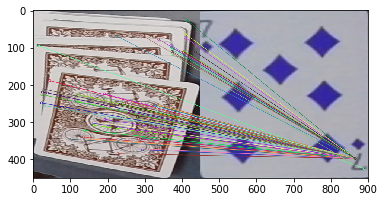

(<matplotlib.image.AxesImage at 0x62cbafb00>, None)

In [650]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# queryKP,queryDesc=detector.detectAndCompute(QueryImg,None)
# # BFMatcher with default params
# bf = cv2.BFMatcher()
# matches = bf.knnMatch(des1,des2, k=2)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
print(len(good))
plt.imshow(img3),plt.show()

In [760]:
def accuracySift(folder, training_set):
    total_c_cards = 0
    total_t_cards = 0
    total_f_cards = 0
    iterations = len(training_set.set)
    for i in range(iterations):
        sys.stdout.write("\rTraining Iteration: " + str(i+1) + "/" + str(iterations)) 
        
        image_cards = training_set.set[i].round
        
        path = os.path.join(folder, training_set.set[i].filename + '.png')
        cards_detected = card_detector(path, deck) 
       
        c_cards, t_cards, f_cards = correctCount(image_cards, cards_detected)
        total_c_cards += c_cards
        total_t_cards += t_cards
        total_f_cards += f_cards
    return (total_c_cards, total_t_cards, total_f_cards)

In [761]:
correct_cards, total_cards, found_cards = accuracySift(ind_cards, training_set_flat)

Training Iteration: 61/61

In [762]:
print(correct_cards/ total_cards)

0.8032786885245902


In [ ]:
# 61 cards are not part of the mask. but are present in the image

In [763]:
print(correct_cards, total_cards, found_cards)

98 122 163


In [ ]:
99 122 235

In [814]:
def card_detector(path, deck):
        image = cv2.imread(path)
        
        thresh = preprocess_image_grad(image)
        thresh = cv2.convertScaleAbs(thresh)

        im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)

        valid_conts = [contours[i] for i in valid_contours(250, 2000, 500, 100000, contours)]
        
        # BFMatcher with default params
        bf = cv2.BFMatcher()
        
        cards_detected = []
        for j in range(len(valid_conts)):
            diffs = []
            warp = affine_transform(image=image, contour=valid_conts[j])

            kp1, des1 = sift.detectAndCompute(warp,None)
            for k in range(len(deck.cards)):
                if(deck.cards[k].sift == None):
                    diffs.append(0)
                else:
                    
                    matches = bf.knnMatch(des1,deck.cards[k].sift[1], k=2)
                    # Apply ratio test
                    good = []
                    for m,n in matches:
                        if m.distance < 0.75*n.distance:
                            good.append([m])

                    diffs.append(len(good))
            indx = np.argmax(diffs)
            if diffs[indx] > 15:
                Flag_Safe_Add = True
                for l in range(len(cards_detected)):
                    if cards_detected[l].suit == deck.cards[indx].suit and cards_detected[l].rank == deck.cards[indx].rank:
                        max_match = max(cards_detected[l].matches, diffs[indx])
                    
                        if max_match is diffs[indx]:
                            cards_detected.pop(l)
                            break
                        else:
                            Flag_Safe_Add = False
                if Flag_Safe_Add:           
                    card = copy.deepcopy(deck.cards[indx])
                    card.contour = valid_conts[j]
                    card.matches = diffs[indx]
                    cards_detected.append(card) 
        return cards_detected

In [905]:
cards = card_detector('CV-BlackjackStudent/GOPR0319.MP4-lbl/08811.png', deck)

In [906]:
im = cv2.imread('CV-BlackjackStudent/GOPR0319.MP4-lbl/08811.png')
for i in range(len(cards)):
    # compute the center of the contour
    M = cv2.moments(cards[i].contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    text = 'card:' + str(cards[i].rank) +" " + str(cards[i].suit)
    cv2.putText(im, text, (cX - 40, cY + 20), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 59, 174), 3)
    cv2.drawContours(im, [cards[i].contour], 0, (0,255,0), 2)             

In [907]:
imS = cv2.resize(im, (960, 540))   
show_image(imS)

## surf
## orb
## kaze